In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

The purpose of this EDA is to explore how education, job title, and years of experience affect the salaries of data professionals from the countries available. To avoid clutter, this EDA will compare data professionals from the top 5 countries in number of responses. 

This dataset was selected as it contains a lot of the requirements that are typically present on job applications. Though the primary interest is for data scientists and analysts in the United States, this dataset provides an opportunity to compare more roles and other countries.

Additionally, despite being a small dataset of only around 7,000 rows there should be enough to provide some insights into whether or not the above are significant factors in a data professional's salary.

The project is organizatized is as follows:
##### Scope
##### Data Cleaning
##### Analysis and Visualizations
##### Conclusions

# Scope
The purpose of this section is to get a feeling for the layout and granularity of the data.

To start, I load the csv into a dataframe and start looking for any glaring issues and relevant columns to the analysis.

In [2]:
rawData = pd.read_csv('C:\salary_survey.csv')
rawData.head()

,survey_year,timestamp,salaryusd,country,postalcode,primarydatabase,yearswiththisdatabase,otherdatabases,employmentstatus,jobtitle,...,hoursworkedperweek,telecommutedaysperweek,populationoflargestcitywithin20miles,employmentsector,lookingforanotherjob,careerplansthisyear,gender,otherjobduties,kindsoftasksperformed,counter
0,2017,2017-01-05T05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05T05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05T05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05T05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05T05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   survey_year                           6893 non-null   int64 
 1   timestamp                             6893 non-null   object
 2   salaryusd                             6893 non-null   object
 3   country                               6893 non-null   object
 4   postalcode                            5934 non-null   object
 5   primarydatabase                       6893 non-null   object
 6   yearswiththisdatabase                 6893 non-null   int64 
 7   otherdatabases                        5520 non-null   object
 8   employmentstatus                      6893 non-null   object
 9   jobtitle                              6893 non-null   object
 10  managestaff                           6893 non-null   object
 11  yearswiththistypeofjob        

Our target is the salaryusd column, with the education, country, job title, and yearswiththistypeofjob columns looking like good candidates for features. Take note that the salary column is object and not int or float, this means there are likely data entry errors in this column and will need to be investigated before any attempts are made to use the data.

In [5]:
rawData[rawData.duplicated()].size

0

Unfortunately there is no ID given to each respondant, therefore it's possible that the same person filled out the survey multiple times in different years. This means that there are potential duplicates even if we can't see them directly as duplicated rows above. This is a caveat but may not pose a problem. The closest thing we have to unique IDs are the timestamps below, but they don't tell us who took the survey, only when. Additionally the counter and survey_year columns are too vague to be used.

In [6]:
rawData.nunique()

survey_year                                3
timestamp                               6891
salaryusd                               1242
country                                   85
postalcode                              2304
primarydatabase                           15
yearswiththisdatabase                     42
otherdatabases                          1339
employmentstatus                           5
jobtitle                                  23
managestaff                                2
yearswiththistypeofjob                    41
howmanycompanies                           7
otherpeopleonyourteam                      7
companyemployeesoverall                    7
databaseservers                          250
education                                  5
educationiscomputerrelated                 2
certifications                             3
hoursworkedperweek                        57
telecommutedaysperweek                     6
populationoflargestcitywithin20miles       6
employment

In [7]:
featCols = rawData[['salaryusd', 'country', 'jobtitle', 'yearswiththistypeofjob', 'education']].copy()

With the data cut down into a more easily managed frame it's time to see the kinds of values in each column.

In [8]:
print(featCols['education'].unique())

['Masters' 'None (no degree completed)' 'Associates (2 years)'
 'Bachelors (4 years)' 'Doctorate/PhD']


In [9]:
print(featCols['jobtitle'].unique())

['DBA' 'Other' 'Developer: App code (C#, JS, etc)' 'Engineer'
 'Developer: T-SQL'
 'Developer: Business Intelligence (SSRS, PowerBI, etc)' 'Architect'
 'Analyst' 'Manager' 'Data Scientist' 'Principal database engineer'
 'DevOps, Sr Software Engineer DBA' 'Technician ' 'Database Specialist'
 'Consultant' 'Systems Administrator' 'Sales' 'DBA / BI Developer'
 'Sr Consultant ' 'Analytics consultant'
 'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)'
 'DBA (Development Focus - tunes queries, indexes, does deployments)'
 'DBA (Production Focus - build & troubleshoot servers, HA/DR)']


The standard levels of education each appear as expected without oddly worded duplicates and there appear to be quite a few special varieties of data base administrators among the data professionals here. Since we're primarily interested in data scientists and analysts, for DBA's the generic 'DBA' can be used later as a representative.

# Data Cleaning
Here is where the data is corrected, sorted, and filtered into feature columns for later visualization and analysis.

First off I clean the salaryusd column as it was identified earlier as an object column instead of int or float.

In [10]:
featCols[pd.to_numeric(featCols.salaryusd, errors = 'coerce').isnull()]

,salaryusd,country,jobtitle,yearswiththistypeofjob,education
5968,50 621,Germany,DBA (General - splits time evenly between writ...,2,Associates (2 years)
6123,"110, 000",United States,DBA (Production Focus - build & troubleshoot s...,1,Bachelors (4 years)
6419,66 000,Sweden,DBA (Production Focus - build & troubleshoot s...,2,Associates (2 years)


In [11]:
featCols.at[5968,'salaryusd'] = 50621
featCols.at[6123,'salaryusd'] = 110000
featCols.at[6419,'salaryusd'] = 66000

That takes care of the formatting issues for the most part, but it's possible that someone entered a decimal point instead of a comma when marking the thousands place in their salary. This will generate some unrealistically low salaries in the data, for example "100.000" instead of "100,000.00". These anomalies need to be isolated and possibly discarded if corrections seem dubious after the final conversion for the salary column.

In [12]:
featCols['salaryusd'] = pd.to_numeric(featCols.salaryusd)
lowFloats = [x for x in featCols['salaryusd'] if x < 30000]
len(lowFloats)

333

In [13]:
print(lowFloats)

[29511.0, 23000.0, 17621.0, 26500.0, 23000.0, 10000.0, 15000.0, 12000.0, 16666.0, 27000.0, 21000.0, 7968.0, 15000.0, 17647.0, 26000.0, 25500.0, 14000.0, 12000.0, 12300.0, 12900.0, 10000.0, 8300.0, 29000.0, 20000.0, 20000.0, 12000.0, 16000.0, 20000.0, 25000.0, 3900.0, 6700.0, 23500.0, 8400.0, 29148.0, 27000.0, 17500.0, 26300.0, 23000.0, 13500.0, 13000.0, 20000.0, 25000.0, 12000.0, 22000.0, 4423.0, 11300.0, 4420.0, 5500.0, 14000.0, 11000.0, 29200.0, 18000.0, 1600.0, 1250.0, 29000.0, 7515.0, 6200.0, 25500.0, 11119.0, 22941.0, 25000.0, 12600.0, 11000.0, 28739.0, 24000.0, 22000.0, 19000.0, 27000.0, 7650.0, 20484.0, 21350.0, 10000.0, 12000.0, 20000.0, 27280.0, 27000.0, 4118.0, 545.0, 14000.0, 15500.0, 8200.0, 27000.0, 8000.0, 20000.0, 27260.0, 17647.0, 21600.0, 20000.0, 24000.0, 15000.0, 28500.0, 24000.0, 18000.0, 29000.0, 25000.0, 11000.0, 25000.0, 13455.0, 18200.0, 20000.0, 13000.0, 24000.0, 26000.0, 27049.0, 8500.0, 11500.0, 5000.0, 20000.0, 7473.0, 430.0, 15500.0, 24000.0, 25000.0, 28000

As expected, there are some pretty strange numbers here. If/why someone accurately calculated their salary to $44.806000000000004, we will never know. Secondly, there appear to be quite a few 0s in the data. These are possibly volunteers or unpaid interns of some kind, or possibly those who declined to give their salary information, all of which are not useful for our purpose and can be safely discarded. Additionally, Salaries that are two standard deviations above the mean are pretty unlikely and those should be discarded as well to avoid skewing the analysis.

In [14]:
pd.options.display.float_format = '{:20,.2f}'.format
featCols.salaryusd.describe()

count               6,893.00
mean               92,807.13
std                57,770.01
min                     0.00
25%                65,000.00
50%                90,000.00
75%               115,000.00
max             1,450,000.00
Name: salaryusd, dtype: float64

In [15]:
print('Percent of data dropped due to data entry errors/outliers:', 
      (len(featCols[featCols.salaryusd < 30000]) + len(featCols[featCols.salaryusd > 204000])) / len(featCols['salaryusd']) * 100)
featCols.drop(featCols[featCols.salaryusd < 30000].index, inplace = True)
featCols.drop(featCols[featCols.salaryusd > 204000].index, inplace = True)

Percent of data dropped due to data entry errors/outliers: 6.107645437400261


In [16]:
featCols['salaryusd'].describe()

count               6,472.00
mean               92,755.12
std                32,721.55
min                30,000.00
25%                68,000.00
50%                91,000.00
75%               115,000.00
max               201,000.00
Name: salaryusd, dtype: float64

Now the salary column is fixed and we haven't lost much data, so the top 5 responding countries need to be selected and put into convenient frames for individual analysis. To begin I start cleaning the country column by getting rid of any newline characters that may be present instead of spaces then find the top 5 countries with the highest number of responses. 

In [17]:
featCols.replace(r'\\n', '', regex = True)
featCols['country'].value_counts()

United States     4433
United Kingdom     646
Canada             241
Australia          182
Germany             94
                  ... 
Cayman Islands       1
Pakistan             1
El Salvador          1
Philippines          1
Belarus              1
Name: country, Length: 69, dtype: int64

In [18]:
US = featCols.loc[featCols['country'] == 'United States']
UK = featCols.loc[featCols['country'] == 'United Kingdom']
CAN = featCols.loc[featCols['country'] == 'Canada']
AUS = featCols.loc[featCols['country'] == 'Australia']
GER = featCols.loc[featCols['country'] == 'Germany']

top5Countries = US.merge(UK.merge(CAN.merge(AUS.merge(GER, how = 'outer'), how = 'outer'), how = 'outer'), how = 'outer')
top5Countries

,salaryusd,country,jobtitle,yearswiththistypeofjob,education
0,"200,000.00",United States,DBA,5,Masters
1,"137,500.00",United States,DBA,6,None (no degree completed)
2,"85,000.00",United States,DBA,2,Bachelors (4 years)
3,"85,000.00",United States,DBA,2,Bachelors (4 years)
4,"85,000.00",United States,DBA,2,Bachelors (4 years)
...,...,...,...,...,...
5591,"80,000.00",Germany,Developer: T-SQL,5,Associates (2 years)
5592,"86,000.00",Germany,"Developer: App code (C#, JS, etc)",12,None (no degree completed)
5593,"63,000.00",Germany,"DBA (Development Focus - tunes queries, indexe...",5,None (no degree completed)
5594,"96,700.00",Germany,DBA (General - splits time evenly between writ...,12,Masters


This looks good, it's time to start visualizing to data and see whether or not the chosen features significantly affect the salaries of the survey participants.

# Analysis and Visualizations
Let's start simply and see what the distribution of salaries looks like for the chosen 5 countries.

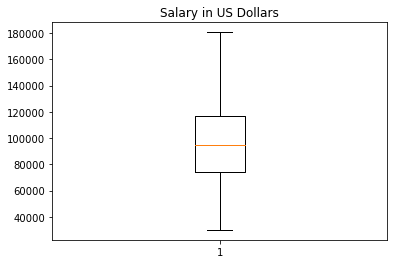

In [20]:
fig,axs = plt.subplots(1,1)
axs.boxplot(top5Countries['salaryusd'], showfliers = False)
axs.set_title('Salary in US Dollars')
plt.show()

It looks like most people fall in the range of 70,000 dollars annually to just under 120,000 per year. But this is for all of the previously selected countries together and probably doesn't represent any of them very well individually. To correct this, let's examine a histogram of the top 5 countries and see how they compare that way.

US:Blue
UK:Orange
CAN:Red
AUS:Green
GER:Purple


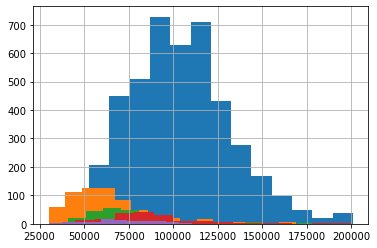

In [21]:
US.salaryusd.hist(bins = 15)
UK.salaryusd.hist(bins = 15)
CAN.salaryusd.hist(bins = 15)
AUS.salaryusd.hist(bins = 15)
GER.salaryusd.hist(bins = 15)
print('US:Blue\nUK:Orange\nCAN:Red\nAUS:Green\nGER:Purple')

Clearly the American data professionals are making more money, but a dollar in the United States may not buy the same things as a dollar in say Germany and vice versa. That being said, it's unlikely that a dollar in the US buys double what it would in the UK regardless of the cost of living index.

This implies that the US pays considerably more on average than the other top 5 responding countries in the survey. Since the original focus of the data is the US, any further analysis should focus on using the US frame.

In [22]:
print('US mean salary:', US.salaryusd.mean(), '\n'
     'UK mean salary:', UK.salaryusd.mean(), '\n'
     'CAN mean salary:', CAN.salaryusd.mean(), '\n'
     'AUS mean salary:', AUS.salaryusd.mean(), '\n'
     'GER mean salary:', GER.salaryusd.mean(), '\n'
     '\nUS Salary descriptive statistics:')
US.salaryusd.describe()

US mean salary: 103500.02594180014 
UK mean salary: 64586.574195046436 
CAN mean salary: 75787.79452282157 
AUS mean salary: 90105.22593406594 
GER mean salary: 72537.27659574468 

US Salary descriptive statistics:


count               4,433.00
mean              103,500.03
std                28,834.06
min                30,000.00
25%                84,000.00
50%               101,725.00
75%               120,000.00
max               201,000.00
Name: salaryusd, dtype: float64

As expected the US data professionals are earning quite a bit more on average than the others, with Australia close behind. It's prudent to explore the effects and distribution of education in the data. 

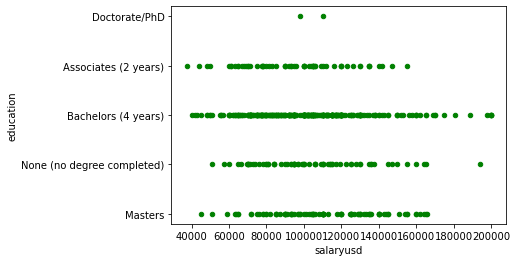

Bachelors (4 years)           2519
Masters                        743
None (no degree completed)     658
Associates (2 years)           490
Doctorate/PhD                   23
Name: education, dtype: int64

In [24]:
US.sample(500).plot(kind = 'scatter', x = 'salaryusd', y = 'education', color = 'g')
plt.show()
US.education.value_counts()

So most of our survey respondants are working at the Bachelor's level with an about equal proportion of those with Master's degrees and no degree at all. Surprisingly, there are very few PhD's, though this may not truly reflect the population.

The above also shows that despite the differences in education, they appear to be making roughly the same salary, with no group greatly skewed to the left or right. Perhaps years of experience will play a more important role? 

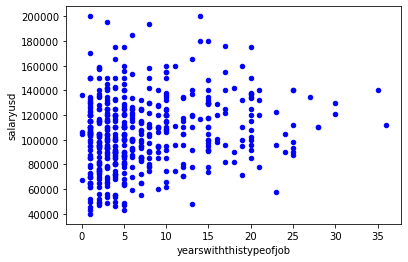

In [25]:
US.sample(500).plot(kind = 'scatter', x = 'yearswiththistypeofjob', y = 'salaryusd', color = 'b')

A decent positive correlation is possible, but isn't strong enough to explain the data. A reasonable hypothesis is that location inside the US plays some role. For example, a data scientist in California probably makes a lot more than one in Iowa. One option here is to figure out the locations of participants using their postal codes. Unfortunately, since the postal code column was optional, only around a third of participants supplied this information. 

Another area of interest here is whether different data professionals make different salaries. Perhaps data analysts, data scientists and DBA's have some contrast?


Data Scientist salary by count: 



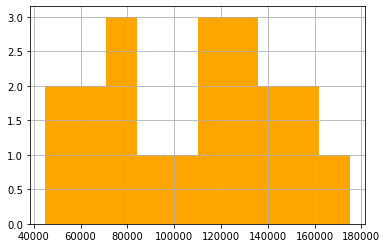

In [26]:
print('\nData Scientist salary by count: \n')
US.loc[featCols['jobtitle'] == 'Data Scientist'].salaryusd.hist(color = 'orange')
plt.show()


Analyst salary by count: 



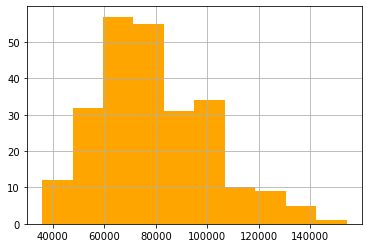

In [27]:
print('\nAnalyst salary by count: \n')
US.loc[featCols['jobtitle'] == 'Analyst'].salaryusd.hist(color = 'orange')
plt.show()


DBA salary by count: 



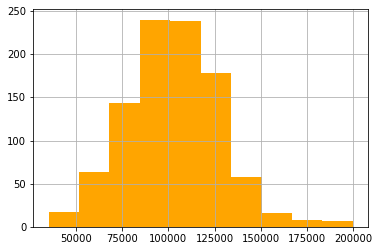

In [28]:
print('\nDBA salary by count: \n')
US.loc[featCols['jobtitle'] == 'DBA'].salaryusd.hist(color = 'orange')
plt.show()

Clearly data scientists and DBA's are doing better than data analysts, but data scientists have quite a lot of variation compared to analysts and DBA's. Also of note is the particularly low quantity of data scientists compared to the other two roles, meaning it's more likely that the low sample size here is not representative of data scientists in the US in general. 

To see some numerical representations of the variation of each role observe the descriptive statistics below:

In [29]:
print("Data Scientist\n",US.loc[featCols['jobtitle'] == 'Data Scientist'].salaryusd.describe(), 
      "\n\nData Analyst\n", US.loc[featCols['jobtitle'] == 'Analyst'].salaryusd.describe(),
      "\n\nDBA\n", US.loc[featCols['jobtitle'] == 'DBA'].salaryusd.describe())

Data Scientist
 count                  20.00
mean              107,799.65
std                39,538.90
min                45,000.00
25%                71,000.00
50%               116,000.00
75%               136,750.00
max               175,000.00
Name: salaryusd, dtype: float64 

Data Analyst
 count                 246.00
mean               78,970.36
std                21,665.86
min                35,800.00
25%                64,000.00
50%                75,000.00
75%                93,117.00
max               154,000.00
Name: salaryusd, dtype: float64 

DBA
 count                 969.00
mean              102,638.52
std                25,441.09
min                35,000.00
25%                86,000.00
50%               102,000.00
75%               120,000.00
max               200,000.00
Name: salaryusd, dtype: float64


# Conclusions
Throughout the analysis it became apparent that the average data professionals in the US survey are college graduates with Bachelor's degrees, less than 10 years of experience in similar roles, and make around $100,000 per year. 

However, despite the apparent fact that education, years of experience, and job title don't determine a person's salary alone or together, there are a lot of places for improvement: 

    Firstly, the sample here was small and may not accurately represent the true population.

    Secondly, it's possible that other factors do make significant differences in salary. This means that something like location inside the US or a particular skillset may be useful in determining how much a data professional makes.

    Thirdly, A more rigorous analysis with a larger dataset in the future may uncover a relationship between the present features and be able to predict them with some reasonable accuracy.
    
Questions for future exploration:

    What role does location in the US and skillset play in determining salary?
    
    What significant factors exist that were not captured by this dataset? 
    
    Is the data industry relatively well balanced in terms of salary for most roles and experience levels?
    
    How does salary compare to total compensation packages?
    
The dataset used in this project was obtain from: data.world/finance/data-professional-salary-survey